# **❏LeNet-5 Architecture**
##  Summarization of LENET-5


1-Fixed-sized input images.

2-Group convolutional and pooling layers into blocks.

3-Repetition of convolutional-pooling blocks in the architecture.

4-Increase in the number of filters with the depth of the network.

5-Distinct feature extraction and classifier parts of the architecture.

In [1]:
from keras.models import Model
from tensorflow.keras import models, layers
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Conv2D, AveragePooling2D

class LeNet(models.Sequential):
    def __init__(self, input_shape, nb_classes):
        super().__init__()
# Input Layer
        self.add(layers.Conv2D(6, kernel_size=(5,5), strides=(1,1), activation='tanh',
                               input_shape=input_shape,padding='same')) # Padding -> To prevent the image from getting distorted, it adds "frames" of zeros around the matrix to ensure that the dimensions will not change after the convolution
# The Hidden Layers for LeNet-5
        self.add(layers.AveragePooling2D(pool_size=(2,2), strides=(1,1), padding='valid'))
        self.add(layers.Conv2D(16, kernel_size=(5,5), strides=(1,1), activation='tanh', padding='valid'))
        self.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2),padding='valid'))
        self.add(layers.Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))
        self.add(Flatten())
        self.add(layers.Dense(84, activation='tanh')) # Fully Connected (Dense) Layer
# Output Layer
        self.add(layers.Dense(nb_classes, activation='softmax'))

# Compile the model
        self.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD')
        self.summary()

# Save model
        self.save('LeNet.h5')

In [2]:
LeNet(input_shape=(28,28,1), nb_classes=10)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "le_net"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 27, 27, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 23, 23, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 11, 11, 16)          │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 120)           │          48,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5880)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 84)                  │         494,004 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 545,546 (2.08 MB)

 Trainable params: 545,546 (2.08 MB)

 Non-trainable params: 0 (0.00 B)

<LeNet name=le_net, built=True>

# **❏AlexNet Architecture**
##  Summarization of ALEXNET


AlexNet made use of the rectified linear activation function, or ReLU, as the nonlinearly after each convolutional layer, instead of S-shaped functions such as the logistic or tanh that were common up until that point. Also, a softmax activation function was used in the output layer, now a staple for multi-class classification with neural networks.

The average pooling used in LeNet-5 was replaced with a max pooling method, although in this case, overlapping pooling was found to outperform non-overlapping pooling that is commonly used today (e.g. stride of pooling operation is the same size as the pooling operation, e.g. 2 by 2 pixels). To address overfitting, the newly proposed dropout method was used between the fully connected layers of the classifier part of the model to improve generalization error.

The architecture of AlexNet is deep and extends upon some of the patterns established with LeNet-5.


In [3]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization

# Set it for Reproducibility
np.random.seed(1000)

# Instantiate an empty model
model = Sequential()

# First Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(224,224,3), kernel_size=(11,11), strides=(4,4), padding='valid'))
model.add(Activation('relu')) # Using relu
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2), padding=('valid')))


# Second Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# Third Convolutional Layer (without MaxPooling)
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))

# Fourth Convolutional Layer (without MaxPooling)
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))

# Fifth Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))


# Passing it to a Fully Connected layer
model.add(Flatten())


# First Fully Connected Layer
model.add(Dense(4096, input_shape=(224*224*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting :)
model.add(Dropout(0.4))

# Second Fully Connected Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Dropout
model.add(Dropout(0.4))

# Third Fully Connected Layer
model.add(Dense(1000))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))

# Output Layer
model.add(Dense(17))
model.add(Activation('softmax')) # Using softmax

model.summary()

# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

# Save model
model.save('AlexNet.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 54, 54, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 54, 54, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 27, 27, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 17, 17, 256)         │       2,973,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 17, 17, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 6, 6, 384)           │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 6, 6, 384)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 4, 4, 384)           │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 4, 4, 384)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 2, 2, 256)           │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4096)                │       1,052,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1000)                │       4,097,000 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 28,054,497 (107.02 MB)

 Trainable params: 28,054,497 (107.02 MB)

 Non-trainable params: 0 (0.00 B)

# **❏VGG Architecture**
##  Summarization of VGG


The first important difference that has become a de facto standard is the use of a large number of small filters. Specifically, filters with the size 3×3 and 1×1 with the stride of one, different from the large sized filters in LeNet-5 and the smaller but still relatively large filters and large stride of four in AlexNet.

    Use of very small convolutional filters, e.g. 3×3 and 1×1 with a stride of one.
    Use of max pooling with a size of 2×2 and a stride of the same dimensions.
    The importance of stacking convolutional layers together before using a pooling layer to define a block.
    Dramatic repetition of the convolutional-pooling block pattern.
    Development of very deep (16 and 19 layer) models.

A number of variants of the architecture were developed and evaluated, although two are referred to most commonly given their performance and depth. They are named for the number of layers: they are the VGG-16 and the VGG-19 for 16 and 19 learned layers respectively.

In [4]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.utils import plot_model

# Creating a vgg block
def vgg_block(layer_in, n_filters, n_conv):
	# add convolutional layers
	for _ in range(n_conv):
		layer_in = Conv2D(n_filters, (3,3), padding='same', activation='relu')(layer_in)
	# add max pooling layer
	layer_in = MaxPooling2D((2,2), strides=(2,2))(layer_in)
	return layer_in

# Define model input
visible = Input(shape=(256, 256, 3))

# Add vgg module (1st)
layer = vgg_block(visible, 64, 2)
# Add vgg module (2nd)
layer = vgg_block(layer, 128, 2)
# Add vgg module (3rd)
layer = vgg_block(layer, 256, 4)

# Create the model
model = Model(inputs=visible, outputs=layer)

# Summarize model
model.summary()

# Plot model architecture
plot_model(model, show_shapes=True, to_file='multiple_vgg_blocks.png')

# Save model
model.save('multiple_vgg_blocks.h5')

Model: "functional_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 256, 256, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 256, 256, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 128, 128, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 128, 128, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 64, 64, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 32, 32, 256)         │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,325,568 (8.87 MB)

 Trainable params: 2,325,568 (8.87 MB)

 Non-trainable params: 0 (0.00 B)

# **❏Inception Architecture**
##  Summarization of INCEPTION


Important innovations in the use of convolutional layers were proposed in the 2015 paper by Christian Szegedy, et al. titled “Going Deeper with Convolutions.”

In the paper, the authors propose an architecture referred to as inception (or inception v1 to differentiate it from extensions) and a specific model called GoogLeNet that achieved top results in the 2014 version of the ILSVRC challenge.

The key innovation on the inception models is called the inception module. This is a block of parallel convolutional layers with different sized filters (e.g. 1×1, 3×3, 5×5) and a 3×3 max pooling layer, the results of which are then concatenated. Below is an example of the inception module taken from the paper.


    Development and repetition of the Inception module.
    Heavy use of the 1×1 convolution to reduce the number of channels.
    Use of error feedback at multiple points in the network.
    Development of very deep (22-layer) models.
    Use of global average pooling for the output of the model.

A problem with a naive implementation of the inception model is that the number of filters (depth or channels) begins to build up fast, especially when inception modules are stacked.

Performing convolutions with larger filter sizes (e.g. 3 and 5) can be computationally expensive on a large number of filters. To address this, 1×1 convolutional layers are used to reduce the number of filters in the inception model. Specifically before the 3×3 and 5×5 convolutional layers and after the pooling layer. The image below taken from the paper shows this change to the inception module.

Model: "functional_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 256, 256, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_16 (Conv2D)        │ (None, 256, 256, 64)   │            256 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_17 (Conv2D)        │ (None, 256, 256, 128)  │          3,584 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_18 (Conv2D)        │ (None, 256, 256, 32)   │          2,432 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_6           │ (None, 256, 256, 3)    │              0 │ input_layer_3[0][0]    │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 256, 256, 227)  │              0 │ conv2d_16[0][0],       │
│                           │                        │                │ conv2d_17[0][0],       │
│                           │                        │                │ conv2d_18[0][0],       │
│                           │                        │                │ max_pooling2d_6[0][0]  │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 6,272 (24.50 KB)

 Trainable params: 6,272 (24.50 KB)

 Non-trainable params: 0 (0.00 B)

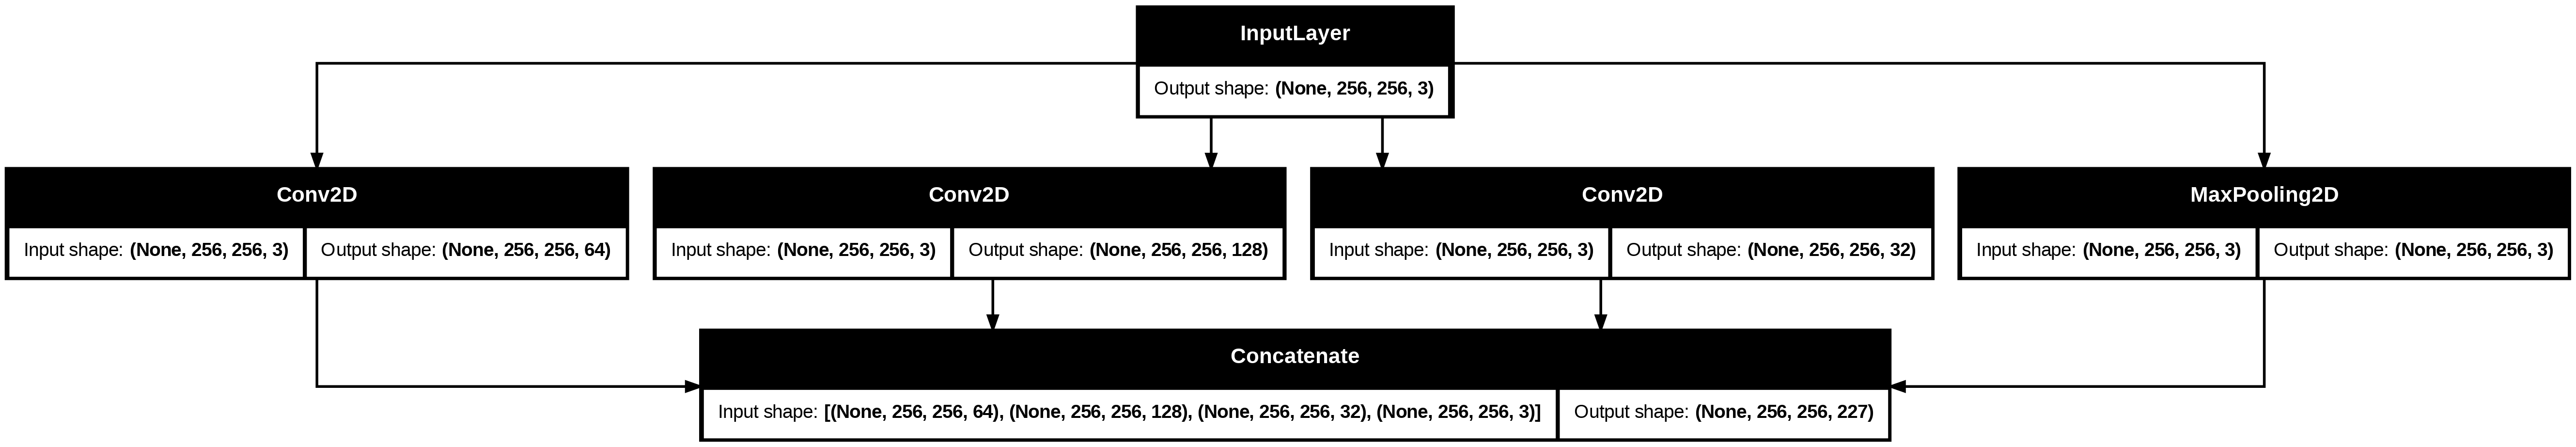

In [5]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import concatenate # To Concatenate Layers in the model
from keras.utils import plot_model

def naive_inception_module(layer_in, f1, f2, f3):
	# 1x1 Convolution Layer
	conv1 = Conv2D(f1, (1,1), padding='same', activation='relu')(layer_in)
	# 3x3 Convolution Layer
	conv3 = Conv2D(f2, (3,3), padding='same', activation='relu')(layer_in)
	# 5x5 Convolution Layer
	conv5 = Conv2D(f3, (5,5), padding='same', activation='relu')(layer_in)

	# 3x3 Max Pooling
	pool = MaxPooling2D((3,3), strides=(1,1), padding='same')(layer_in)

	# Concatenate filters, assumes filters last
	layer_out = concatenate([conv1, conv3, conv5, pool], axis=-1)
	return layer_out

# Define model input
visible = Input(shape=(256, 256, 3))

# Add inception module
layer = naive_inception_module(visible, 64, 128, 32)

# Create the model
model = Model(inputs=visible, outputs=layer)

# Summarize model
model.summary()
# Plot model architecture
plot_model(model, show_shapes=True, to_file='naive_inception_module.png')

**More Advanced of the Last Naive one ➨**

In [6]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Input, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

def inception_module(layer_in, f1, f2_in, f2_out, f3_in, f3_out, f4_out):
    # 1x1 Conv
    conv1 = Conv2D(f1, (1,1), padding='same', activation='relu')(layer_in)

    # 3x3 Conv
    conv3 = Conv2D(f2_in, (1,1), padding='same', activation='relu')(layer_in)
    conv3 = Conv2D(f2_out, (3,3), padding='same', activation='relu')(conv3)

    # 5x5 Conv
    conv5 = Conv2D(f3_in, (1,1), padding='same', activation='relu')(layer_in)
    conv5 = Conv2D(f3_out, (5,5), padding='same', activation='relu')(conv5)

    # 3x3 Max Pooling
    pool = MaxPooling2D((3,3), strides=(1,1), padding='same')(layer_in)
    pool = Conv2D(f4_out, (1,1), padding='same', activation='relu')(pool)

    # Concatenate filters
    layer_out = concatenate([conv1, conv3, conv5, pool], axis=-1)
    return layer_out

# Define model input
visible = Input(shape=(256, 256, 3))

# Add inception blocks
layer = inception_module(visible, 64, 96, 128, 16, 32, 32)  # Inception Block 1
layer = inception_module(layer, 128, 128, 192, 32, 96, 64)  # Inception Block 2

# Create the model
model = Model(inputs=visible, outputs=layer)

# Summarize model
model.summary()

# Plot model architecture
plot_model(model, show_shapes=True, to_file='/content/inception_module.png')

# Save model
model.save('inception_module_advanced.h5')

Model: "functional_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 256, 256, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_20 (Conv2D)        │ (None, 256, 256, 96)   │            384 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_22 (Conv2D)        │ (None, 256, 256, 16)   │             64 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_7           │ (None, 256, 256, 3)    │              0 │ input_layer_4[0][0]    │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_19 (Conv2D)        │ (None, 256, 256, 64)   │            256 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_21 (Conv2D)        │ (None, 256, 256, 128)  │        110,720 │ conv2d_20[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_23 (Conv2D)        │ (None, 256, 256, 32)   │         12,832 │ conv2d_22[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_24 (Conv2D)        │ (None, 256, 256, 32)   │            128 │ max_pooling2d_7[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 256, 256, 256)  │              0 │ conv2d_19[0][0],       │
│ (Concatenate)             │                        │                │ conv2d_21[0][0],       │
│                           │                        │                │ conv2d_23[0][0],       │
│                           │                        │                │ conv2d_24[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_26 (Conv2D)        │ (None, 256, 256, 128)  │         32,896 │ concatenate_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_28 (Conv2D)        │ (None, 256, 256, 32)   │          8,224 │ concatenate_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_8           │ (None, 256, 256, 256)  │              0 │ concatenate_1[0][0]    │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_25 (Conv2D)        │ (None, 256, 256, 128)  │         32,896 │ concatenate_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_27 (Conv2D)        │ (None, 256, 256, 192)  │        221,376 │ conv2d_26[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_29 (Conv2D)        │ (None, 256, 256, 96)   │         76,896 │ conv2d_28[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_30 (Conv2D)        │ (None, 256, 256, 64)   │         16,448 │ max_pooling2d_8[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_2        

 Total params: 513,120 (1.96 MB)

 Trainable params: 513,120 (1.96 MB)

 Non-trainable params: 0 (0.00 B)

# **❏ResNet Architecture**
##  Summarization of RESNET


A final important innovation in convolutional neural nets that we will review was proposed by Kaiming He, et al. in their 2016 paper titled “Deep Residual Learning for Image Recognition.”

In the paper, the authors proposed a very deep model called a Residual Network, or ResNet for short, an example of which achieved success on the 2015 version of the ILSVRC challenge.

Their model had an impressive 152 layers. Key to the model design is the idea of residual blocks that make use of shortcut connections. These are simply connections in the network architecture where the input is kept as-is (not weighted) and passed on to a deeper layer, e.g. skipping the next layer.

A residual block is a pattern of two convolutional layers with ReLU activation where the output of the block is combined with the input to the block, e.g. the shortcut connection. A projected version of the input used via 1×1 if the shape of the input to the block is different to the output of the block, so-called 1×1 convolutions. These are referred to as projected shortcut connections, compared to the unweighted or identity shortcut connections.

The authors start with what they call a plain network, which is a VGG-inspired deep convolutional neural network with small filters (3×3), grouped convolutional layers followed with no pooling in between, and an average pooling at the end of the feature detector part of the model prior to the fully connected output layer with a softmax activation function.


    Use of shortcut connections.
    Development and repetition of the residual blocks.
    Development of very deep (152-layer) models.

In [7]:
from keras.models import Model
from keras.layers import Input, Activation, Conv2D, MaxPooling2D, add
from keras.utils import plot_model

def residual_module(layer_in, n_filters):
	merge_input = layer_in
	# Check if the number of filters needs to be increase
	if layer_in.shape[-1] != n_filters:
		merge_input = Conv2D(n_filters, (1,1), padding='same', activation='relu', kernel_initializer='he_normal')(layer_in)

	# Conv1
	conv1 = Conv2D(n_filters, (3,3), padding='same', activation='relu', kernel_initializer='he_normal')(layer_in)
	# Conv2
	conv2 = Conv2D(n_filters, (3,3), padding='same', activation='linear', kernel_initializer='he_normal')(conv1)

	# Add filters, assume filters last
	layer_out = add([conv2, merge_input])
	# Activation function
	layer_out = Activation('relu')(layer_out)
	return layer_out

# Define model input
visible = Input(shape=(256, 256, 3))

# Add vgg module
layer = residual_module(visible, 64)

# Create the model
model = Model(inputs=visible, outputs=layer)

# Summarize model
model.summary()

# Plot model architecture
plot_model(model, show_shapes=True, to_file='residual_module.png')

# Save model
model.save('residual_module.h5')

Model: "functional_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5             │ (None, 256, 256, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_32 (Conv2D)        │ (None, 256, 256, 64)   │          1,792 │ input_layer_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_33 (Conv2D)        │ (None, 256, 256, 64)   │         36,928 │ conv2d_32[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_31 (Conv2D)        │ (None, 256, 256, 64)   │            256 │ input_layer_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 256, 256, 64)   │              0 │ conv2d_33[0][0],       │
│                           │                        │                │ conv2d_31[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_9 (Activation) │ (None, 256, 256, 64)   │              0 │ add[0][0]              │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 38,976 (152.25 KB)

 Trainable params: 38,976 (152.25 KB)

 Non-trainable params: 0 (0.00 B)